In [16]:
# Basic Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Text Processing
import re
import string
import nltk
!pip install wordcloud
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from wordcloud import WordCloud


# Sentiment Analysis
!pip install textblob
from textblob import TextBlob
from nltk.sentiment import SentimentIntensityAnalyzer

# Machine Learning
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.pipeline import Pipeline
from sklearn.metrics import accuracy_score, classification_report

# Warnings
import warnings
warnings.filterwarnings("ignore")

# Download necessary resources
nltk.download('stopwords')
nltk.download('punkt')
nltk.download('vader_lexicon')

   ---------------------------------------- 0.0/624.3 kB ? eta -:--:--
   ---------------- ----------------------- 262.1/624.3 kB ? eta -:--:--
   ---------------------------------------- 624.3/624.3 kB 2.9 MB/s eta 0:00:00


[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Admin\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping corpora\stopwords.zip.
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\Admin\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping tokenizers\punkt.zip.
[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\Admin\AppData\Roaming\nltk_data...


True

In [37]:
# import dataset
df = pd.read_csv("amazon.csv")
df.head()

,Unnamed: 0,reviewerName,overall,reviewText,reviewTime,day_diff,helpful_yes,helpful_no,total_vote,score_pos_neg_diff,score_average_rating,wilson_lower_bound
0,0,NaN,4,No issues.,23-07-2014,138,0,0,0,0,0.0,0.0
1,1,0mie,5,"Purchased this for my device, it worked as adv...",25-10-2013,409,0,0,0,0,0.0,0.0
2,2,1K3,4,it works as expected. I should have sprung for...,23-12-2012,715,0,0,0,0,0.0,0.0
3,3,1m2,5,This think has worked out great.Had a diff. br...,21-11-2013,382,0,0,0,0,0.0,0.0
4,4,2&amp;1/2Men,5,"Bought it with Retail Packaging, arrived legit...",13-07-2013,513,0,0,0,0,0.0,0.0


In [39]:
# Check for missing values
df.isnull().sum()

Unnamed: 0              0
reviewerName            1
overall                 0
reviewText              1
reviewTime              0
day_diff                0
helpful_yes             0
helpful_no              0
total_vote              0
score_pos_neg_diff      0
score_average_rating    0
wilson_lower_bound      0
dtype: int64

In [42]:
# Drop missing values
df = df.dropna(subset=['reviewerName'])
df = df.dropna(subset=['reviewText'])

In [43]:
df.isnull().sum()

Unnamed: 0              0
reviewerName            0
overall                 0
reviewText              0
reviewTime              0
day_diff                0
helpful_yes             0
helpful_no              0
total_vote              0
score_pos_neg_diff      0
score_average_rating    0
wilson_lower_bound      0
dtype: int64

In [44]:
# Remove duplicates
df = df.drop_duplicates(subset=['reviewText'])

In [45]:
# Download stopwords if not available

nltk.download('stopwords')
stop_words = set(stopwords.words('english'))

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Admin\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [46]:
# Function to clean text
def clean_text(text):
    text = text.lower()  # Convert to lowercase
    text = re.sub(r'\W', ' ', text)  # Remove special characters
    text = re.sub(r'\s+', ' ', text).strip()  # Remove extra spaces
    text = ' '.join([word for word in text.split() if word not in stop_words])
    return text

In [47]:
df['clean_text'] = df['reviewText'].apply(clean_text)

In [48]:
print(df[['reviewText', 'clean_text']].head())

                                          reviewText  \
1  Purchased this for my device, it worked as adv...   
2  it works as expected. I should have sprung for...   
3  This think has worked out great.Had a diff. br...   
4  Bought it with Retail Packaging, arrived legit...   
5  It's mini storage.  It doesn't do anything els...   

                                          clean_text  
1  purchased device worked advertised never much ...  
2  works expected sprung higher capacity think ma...  
3  think worked great diff bran 64gb card went so...  
4  bought retail packaging arrived legit orange e...  
5  mini storage anything else supposed purchased ...  


In [49]:
df.info()
df.describe()

<class 'pandas.core.frame.DataFrame'>
Index: 4911 entries, 1 to 4914
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Unnamed: 0            4911 non-null   int64  
 1   reviewerName          4911 non-null   object 
 2   overall               4911 non-null   int64  
 3   reviewText            4911 non-null   object 
 4   reviewTime            4911 non-null   object 
 5   day_diff              4911 non-null   int64  
 6   helpful_yes           4911 non-null   int64  
 7   helpful_no            4911 non-null   int64  
 8   total_vote            4911 non-null   int64  
 9   score_pos_neg_diff    4911 non-null   int64  
 10  score_average_rating  4911 non-null   float64
 11  wilson_lower_bound    4911 non-null   float64
 12  clean_text            4911 non-null   object 
dtypes: float64(2), int64(7), object(4)
memory usage: 537.1+ KB


,Unnamed: 0,overall,day_diff,helpful_yes,helpful_no,total_vote,score_pos_neg_diff,score_average_rating,wilson_lower_bound
count,4911.000000,4911.000000,4911.000000,4911.000000,4911.000000,4911.000000,4911.000000,4911.000000,4911.000000
mean,2458.049074,4.587660,437.370393,1.311749,0.210344,1.522093,1.101405,0.075394,0.020027
std,1418.465448,0.997146,209.336491,41.636096,4.024915,44.141043,39.383972,0.256021,0.077171
min,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,-130.000000,0.000000,0.000000
25%,1230.500000,5.000000,281.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,2458.000000,5.000000,431.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,3686.500000,5.000000,601.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,4914.000000,5.000000,1064.000000,1952.000000,183.000000,2020.000000,1884.000000,1.000000,0.957544


In [51]:
# Lexicon-Based Sentiment Analysis (TextBlob & VADER)
df['polarity'] = df['reviewText'].apply(lambda x: TextBlob(x).sentiment.polarity)
df['sentiment'] = df['polarity'].apply(lambda x: 'positive' if x > 0 else ('negative' if x < 0 else 'neutral'))

sia = SentimentIntensityAnalyzer()
df['compound_score'] = df['reviewText'].apply(lambda x: sia.polarity_scores(x)['compound'])
df['sentiment_vader'] = df['compound_score'].apply(lambda x: 'positive' if x > 0 else ('negative' if x < 0 else 'neutral'))

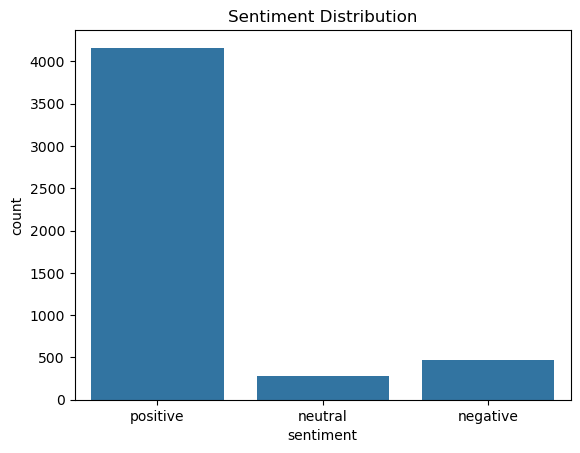

In [52]:
sns.countplot(x=df['sentiment'])
plt.title("Sentiment Distribution")
plt.show()

In [56]:
# Advanced Sentiment Analysis
# Feature Engineering (TF-IDF)

from sklearn.feature_extraction.text import TfidfVectorizer

# Initialize TF-IDF Vectorizer
tfidf = TfidfVectorizer(max_features=5000)  # Limiting to 5000 important words
X = tfidf.fit_transform(df['clean_text'])  # Transform text into numerical features

# Convert to DataFrame for better visualization
tfidf_df = pd.DataFrame(X.toarray(), columns=tfidf.get_feature_names_out())
print(tfidf_df.head())


    00  000   01  017   03  032g   04   06  064g   08  ...  zippy  zips   zl  \
0  0.0  0.0  0.0  0.0  0.0   0.0  0.0  0.0   0.0  0.0  ...    0.0   0.0  0.0   
1  0.0  0.0  0.0  0.0  0.0   0.0  0.0  0.0   0.0  0.0  ...    0.0   0.0  0.0   
2  0.0  0.0  0.0  0.0  0.0   0.0  0.0  0.0   0.0  0.0  ...    0.0   0.0  0.0   
3  0.0  0.0  0.0  0.0  0.0   0.0  0.0  0.0   0.0  0.0  ...    0.0   0.0  0.0   
4  0.0  0.0  0.0  0.0  0.0   0.0  0.0  0.0   0.0  0.0  ...    0.0   0.0  0.0   

   zone  zoning  zoom  zte  ztpad  zumo  zune  
0   0.0     0.0   0.0  0.0    0.0   0.0   0.0  
1   0.0     0.0   0.0  0.0    0.0   0.0   0.0  
2   0.0     0.0   0.0  0.0    0.0   0.0   0.0  
3   0.0     0.0   0.0  0.0    0.0   0.0   0.0  
4   0.0     0.0   0.0  0.0    0.0   0.0   0.0  

[5 rows x 5000 columns]


In [57]:
# Machine Learning Model (Naïve Bayes)

from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, classification_report

# Define target variable (based on star ratings)
df['sentiment'] = df['overall'].apply(lambda x: 'positive' if x > 3 else ('negative' if x < 3 else 'neutral'))

# Split data
X_train, X_test, y_train, y_test = train_test_split(X, df['sentiment'], test_size=0.2, random_state=42)

# Train model
model = MultinomialNB()
model.fit(X_train, y_train)

# Predictions
y_pred = model.predict(X_test)

# Evaluate model
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))

Accuracy: 0.9033570701932858
Classification Report:
               precision    recall  f1-score   support

    negative       0.00      0.00      0.00        69
     neutral       0.00      0.00      0.00        26
    positive       0.90      1.00      0.95       888

    accuracy                           0.90       983
   macro avg       0.30      0.33      0.32       983
weighted avg       0.82      0.90      0.86       983



In [58]:
df_export = df[['reviewText', 'sentiment']]
df_export.to_csv("sentiment_analysis_results.csv", index=False)
print("Processed data saved successfully!")

Processed data saved successfully!
